<a href="https://colab.research.google.com/github/Kenethoriga/ADI-2024-Pre-Screening-Assessment/blob/main/ADI_2024_Pre_Screening_Assessment_kenethoriga10_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions


Hello, and thank you for your interest in this year's Applied Data Institute.

The goal of this notebook is to get a sense for

*   your fluency programming in Python
*   how you bring a computational lens to novel technical problems.


There are two sets of tasks in the notebook. The first are "core" tasks that test programming ability and computational thinking. The second are "data" tasks, that as the name suggests, involve working with some form of data. **We ask that you attempt at least**

*   **2 out of the 3 "core" tasks, and**
*   **1 out of the 3 "data" tasks.**

Complete as much of the notebook as you can in the alotted 24 hour timeframe.
The tasks are purposefully designed to be challenging, so it is perfectly reasonable to leave some blank or partially complete. If there are some tasks that you have no idea how to tackle, fear not, and just skip them. But the more you tackle, the more it gives us a chance to see your technical critical thinking and computational creativity.

Please comment your code as thoroughly as possble, and use the full functionality of python notebooks to explain your thought process in as much detail as possible. We are even more interested in the rationale behind your code than the code itself.

At the end of the 24-hour mark, this notebook will automatically  submit itself, and you will lose edit access to this file. If you've been working on your answers elsewhere, please ensure that you have added them to **this notebook** before the end of the 24 hour period.

**Make sure your notebook runs independently of any files on your local system. It should run without error when we run it on our side. If your answers involve reading in datasets, read in the dataset from a URL: you can either find a Kaggle link to the relevant dataset or upload the dataset to Github and generate a URL as needed.**

**A note on cheating/plagiarism:**

The assessment is **open-book**: doing research and digesting relevant knowledge online while completing this assessment is encouraged -- rarely do real world tasks involve being shut out from outside help. However, we insist that the final notebook you submit be the result of your own efforts, i.e. that you have not collaborated on it with anyone else. With regards to Large Language Models like ChatGPT, we ask that you do not use them to generate code or explanations of your code. This is for both your and our benefit:


*   The problems are sufficiently involved that the LLM will likely lead you astray
*   We wish to assess your programming capabilities, not that of the LLM.
*   Do not rob yourself of a chance to learn and be stretched mentally. Above all, if you engaged with this assessment with the right attitude, it should be a fun learning experience.


Nonetheless, LLMs could be a useful guide in scaffolding your research process as you familiarize yourself with any of the problems in this notebook. Using them in the manner one would use Wikipedia is permissible.

# Core Tasks

## Task 1.



**A)** One of the simplest ways you can encrypt a message is by rearranging the letters. For instance, one can imagine taking a string and rearranging it so that the letters at even indexes appear first, followed by the ones at odd indexes. So, for example, `'message'` will become `'msaeesg'` (remember Python counts from zero!).

Let's consider more complicated versions of this. Suppose we have the string `'I_love_to_program!'`. Instead of even and odd, we could group the characters into 3:

* The first group with indexes 0,3,6,9, ...
* The next group with indexes 1,4,7,10,...
* And the final group with indexes 2,5,8,11,...

So for `'I_love_to_program!'` the groups would be `'Io__oa'` , `'_vtpgm'` , `'leorr!'`, yielding the encrypted message `'Io__oa_vtpgmleorr!'`.

And we're not limited to steps of 2 in the case of even/odd, or steps of 3 like in the example above. We can have any step size $n \geq 2$ to define our groups of indices.

Implement the function `n_step_encrypt(phrase, n)` below that does this type of encryption for any arbitrary step-size $n \geq 2$:

In [ ]:
def n_step_encrypt(phrase, n):
    # Initialize a list of empty strings for each group
    groups = [''] * n

    # Iterate over the phrase and assign characters to their respective groups
    for index, char in enumerate(phrase):
        group_index = index % n
        groups[group_index] += char

    # Join all groups into a single string to get the encrypted message
    encrypted_message = ''.join(groups)
    return encrypted_message

# Example usage:
phrase = 'I_love_to_program!'
n = 3
print(n_step_encrypt(phrase, n))  # Output: 'Io__oa_vtpgmleorr!'


Io__oa_vtpgmleorr!


**B)** Now implement the `n_step_decrypt` function that does the corresponding decryption for any arbitrary step-size $n \geq 2$. For example, for $n = 3$, the function should take `'Io__oa_vtpgmleorr!'` and return `'I_love_to_program!'`:

In [ ]:
def n_step_decrypt(encrypted_message, n):
    # Calculate the number of characters each group would have
    length = len(encrypted_message)
    base_length = length // n
    extra_chars = length % n

    group_lengths = [base_length + (1 if i < extra_chars else 0) for i in range(n)]

    # Split the encrypted message into groups based on calculated lengths
    groups = []
    start = 0
    for group_length in group_lengths:
        groups.append(encrypted_message[start:start + group_length])
        start += group_length

    # Reconstruct the original message by interleaving characters from each group
    decrypted_message = []
    for i in range(base_length + 1):  # +1 to handle any possible extra character in the groups
        for group in groups:
            if i < len(group):
                decrypted_message.append(group[i])

    return ''.join(decrypted_message)

# Example usage:
encrypted_message = 'Io__oa_vtpgmleorr!'
n = 3
print(n_step_decrypt(encrypted_message, n))  # Output: 'I_love_to_program!'


I_love_to_program!


## Task 2.



**A)** Write a program that proves the following:

In any arbitrary gathering of 6 people, one of the following has to be true:

*   There will be a group of at least 3 people who all know each other.
*   There will be a group of at least 3 people who have never met each other before.

In [ ]:
# write your code here; make sure to add lots of comments explaining your code
import itertools

def is_monochromatic_triangle(graph, color):
    """ Checks if there is a monochromatic triangle of the given color in the graph """
    for triplet in itertools.combinations(range(6), 3):
        a, b, c = triplet
        if graph[a][b] == color and graph[a][c] == color and graph[b][c] == color:
            return True
    return False

def has_3_or_more(graph):
    """ Checks if there is a group of at least 3 people who all know each other or don't know each other """
    return is_monochromatic_triangle(graph, 1) or is_monochromatic_triangle(graph, 0)

def create_graph(edges):
    """ Create a 6-node graph from edge list with two possible states: 0 and 1 """
    graph = [[-1]*6 for _ in range(6)]
    for (a, b), color in edges.items():
        graph[a][b] = color
        graph[b][a] = color
    return graph

def generate_all_edge_colorings():
    nodes = range(6)
    all_edges = list(itertools.combinations(nodes, 2))
    for coloring in itertools.product([0, 1], repeat=len(all_edges)):
        edges = dict(zip(all_edges, coloring))
        graph = create_graph(edges)
        yield graph

def main():
    for graph in generate_all_edge_colorings():
        if not has_3_or_more(graph):
            print("Found a counterexample (which should be impossible):")
            print(graph)
            return
    print("Every coloring has at least one monochromatic triangle")

if __name__ == "__main__":
    main()




Every coloring has at least one monochromatic triangle


**B)** Provide an argument that this would also have to be true for gatherings bigger than 6 people. You can use words, or code, or both to do this.

In [ ]:
import itertools

def is_monochromatic_triangle(graph, color):
    """ Checks if there is a monochromatic triangle of the given color in the graph """
    n = len(graph)
    for triplet in itertools.combinations(range(n), 3):
        a, b, c = triplet
        if graph[a][b] == color and graph[a][c] == color and graph[b][c] == color:
            return True
    return False

def has_3_or_more(graph):
    """ Checks if there is a group of at least 3 people who all know each other or don't know each other """
    return is_monochromatic_triangle(graph, 1) or is_monochromatic_triangle(graph, 0)

def create_graph(edges, n):
    """ Create an n-node graph from edge list with two possible states: 0 and 1 """
    graph = [[-1]*n for _ in range(n)]
    for (a, b), color in edges.items():
        graph[a][b] = color
        graph[b][a] = color
    return graph

def generate_all_edge_colorings(n):
    nodes = range(n)
    all_edges = list(itertools.combinations(nodes, 2))
    for coloring in itertools.product([0, 1], repeat=len(all_edges)):
        edges = dict(zip(all_edges, coloring))
        graph = create_graph(edges, n)
        yield graph

def main(n):
    for graph in generate_all_edge_colorings(n):
        if not has_3_or_more(graph):
            print(f"Found a counterexample for K_{n}:")
            print(graph)
            return
    print(f"For K_{n}, every coloring has at least one monochromatic triangle")

if __name__ == "__main__":
    n = 7  # Example: Check for K_7
    main(n)


For K_7, every coloring has at least one monochromatic triangle


(Write your argument here)

**C)** It turns out if you wanted to ensure that in your gathering there will be a group of at least *4* people who either all know each other, or have all never met each other before, then we would need a much bigger gathering. In fact, you would need 18 people to ensure this is the case. Would repurposing the code you wrote in Part **A** work for proving this fact? If so, how? If not, what might be the practical challenges associated with this?


(Explain your reasoning here)

## Task 3.

Let's model parallel parking of cars. Suppose there is a street, on which if cars parked in the most efficient manner with no unnecessary gaps, the street would fit $n$ cars (we need only concern ourselves with one side of the street). We can consider this street to be $n$ car-lengths long (where the minimum necessary gap between cars gets incorporated into the unit of "one car length"). For ease, we can assume that all the cars we consider take up the same space along a street, i.e. 1 car-length.

Suppose the street is initially empty. Then a car parks, and given the entire street is available, the car parks randomly anywhere along the street -- the car has an equal probability of selecting any position along the street. Then a second car comes along, and also parks randomly, with the only constraint that the space the second car occupies cannot overlap with the space occupied by the first car (a physical impossibility). Thus it has an equal probability of selecting any position along the street provided its viable, i.e. it doesn't overlap with the already parked car. The third car also parks randomly, but this time it must not overlap with either of the previous two cars and so on ... until there are no gaps large enough to fit one more car.

The process then terminates, with a number of cars necessarily $\leq n$.

**A)** Write a function that simulates the process of an `n`-car-length street filling up with parallel-parked cars. The function should return:

*   An array `pos` of floats containing the positions of the front of the cars along the street (note that all cars are assumed to be the same length).
*   An integer `occ` that represents the final occupancy of the street number of cars that managed to park along the street.

In [ ]:
import random

def parallel_parking(n):
    pos = []
    occ = 0
    while True:
        if occ == 0:
            pos.append(random.uniform(0, n))
            occ += 1
        else:
            gap_start = 0
            for p in pos:
                if p > gap_start:
                    gap_end = p
                    break
                gap_start = p + 1
            else:
                gap_start = pos[-1] + 1
                gap_end = n
            if gap_end - gap_start >= 1:
                pos.append(random.uniform(gap_start, gap_end - 1))
                pos.sort()
                occ += 1
            else:
                break
    return pos, occ

Below, you will see a loop that runs this simulation 1 million times, and stores the value of `occ` in an array called `occupancy`. The final line of the cell normalizes `occupancy` by the maximum possible occupancy `n`, to arrive at a fractional value for the occupancy.

In [ ]:
n = 10  # street length in car lengths
occupancy = []

for _ in range(1000000):
    _, occ = parallel_parking(n)
    occupancy.append(occ)

average_occupancy = sum(occupancy) / len(occupancy) / n
print("Average fractional occupancy:", average_occupancy)

Average fractional occupancy: 0.27649650000000003


**B)** Generate a histogram based on the `occupancy` array, and compute some descriptive statistics for the simulated fractional occupancies. Does the average value make sense to you? If so, why? If not, why not? Does the relationship between the mean, median, and mode make sense to you? Again, if so, why and if not, why not? Lastly, try changing the value of `n`, and running the loop above again. How does that change your results? What happens as you make `n` bigger and bigger?

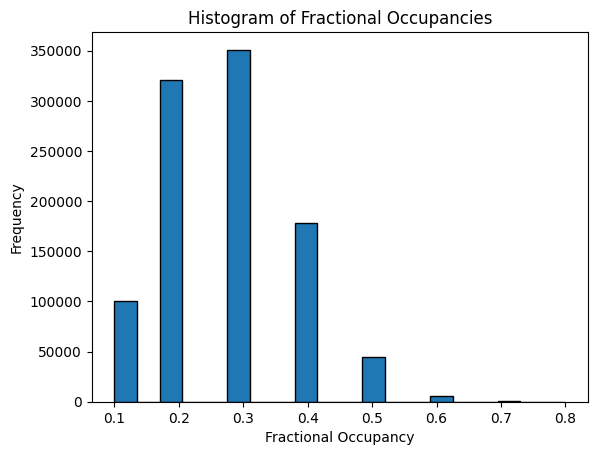

Mean: 0.2764152
Median: 0.3
Mode: 0.3
Standard Deviation: 0.10381751879601055


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = 10  # street length in car lengths
occupancy = []

for _ in range(1000000):
    _, occ = parallel_parking(n)
    occupancy.append(occ / n)  # normalize occupancy by n

plt.hist(occupancy, bins=20, edgecolor='black')
plt.xlabel('Fractional Occupancy')
plt.ylabel('Frequency')
plt.title('Histogram of Fractional Occupancies')
plt.show()

print("Mean:", np.mean(occupancy))
print("Median:", np.median(occupancy))
print("Mode:", max(set(occupancy), key=occupancy.count))
print("Standard Deviation:", np.std(occupancy))

(Comment on your analysis here.)




# Data Tasks

## Task 4.

Thomas Murray, our Chief Community Officer and Speaking Lab faculty, is an aviation geek (his own words). A pastime of his is to play a game called [Airportle](https://www.going.com/airportle), which is identical to the popular game [Wordle](https://www.nytimes.com/games/wordle/index.html), but with 3-letter [IATA codes](https://en.wikipedia.org/wiki/IATA_airport_code) instead of 5-letter words in English.

---
For those not familiar with the game Wordle, the rules of Airportle are spelled out below:

International airports around the world have a 3-letter [IATA code](https://en.wikipedia.org/wiki/IATA_airport_code) used to identify them with ease. The objective in Airportle is to guess the IATA code of the day. You have 6 attempts to guess it correctly, with the game providing helpful feedback on your guess. To be more specific.

1.   Any letter in your guess that's not in the IATA code of the day will be grey.
2.   Any letter in your guess that is in the IATA code of the day, but is not in the same position in the code will light up yellow.
2.   Any letter in your guess that is in the IATA code of the day and is in the correct position in the code will light up green.

Here are some examples to help you wrap your head around it:

If the IATA code of the day was "DFW" and you guessed "LHR", all of the letters 'L', 'H', and 'R' will be grey, as none of these are in the code of the day.

If the IATA code of the day was "DFW" and you guessed "ORD", the letters 'O' and 'R' will be grey, but the letter 'D' will be yellow, because it's in the code of the day, but not in the correct position.

If the IATA code of the day was "DFW" and you guessed "DEL", the letter 'D' will light up green because it is in the code of the day and in the correct position, while the letter "E" and "L" will be grey

---

Though Thomas is highly knolwedgable about all things aviation, he wants to take his Airportle-ing to another level. Below you will find a pandas dataframe containing all the possible IATA codes of the day.

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/bhasiEF/IATA_CodeList/main/airports-code%40public.csv"
airports = pd.read_csv(url, usecols = ['IATA Code',	'Airport Name',	'City Name',	'Country Name'], header=0)

airports

,IATA Code,Airport Name,City Name,Country Name
0,YCB,Cambridge Bay,Cambridge Bay,Canada
1,YKD,Township Airport,Kincardine,Canada
2,UPF,Pforheim,Pforheim,Germany
3,IXB,Bagdogra,Bagdogra,India
4,IMK,Simikot,Simikot,Nepal
...,...,...,...,...
9182,HSL,Huslia,Huslia,United States
9183,KAQ,Kamulai,Kamulai,Papua New Guinea
9184,APE,San Juan Aposento,San Juan Aposento,Peru
9185,ODB,Cordoba,Cordoba,Spain



**A)** Using your data skills, analyze the list of codes to make some strategy recommendations so that Thomas can improve his chances of guessing the correct airport code with as few guesses as possible on average. For example, an obvious strategy question might be:

Is there an optimal starting guess that improves your chances of guessing the correct code with as few guesses as possible on average? If so what would that be?

After this, the strategy questions abound! Where should Thomas go after this initial guess? This is an open-ended task, so use it to demonstate your critical engagement and creativity!

Along with your code for analysis, detail your strategy recommendations in the text cell below.

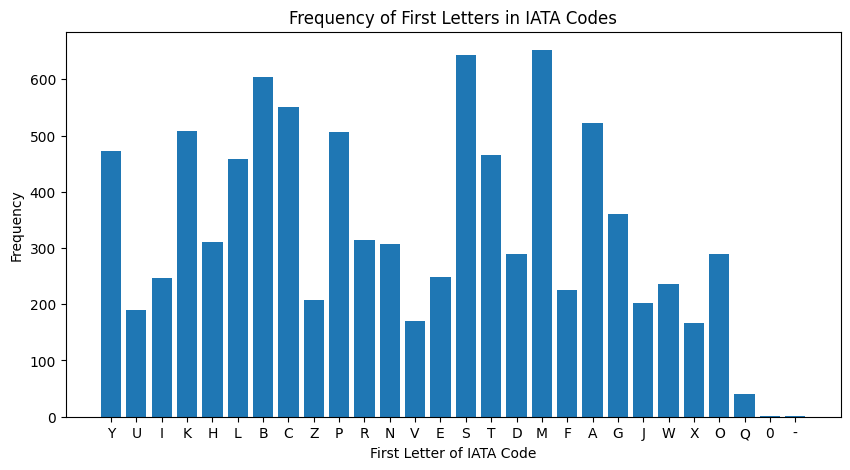

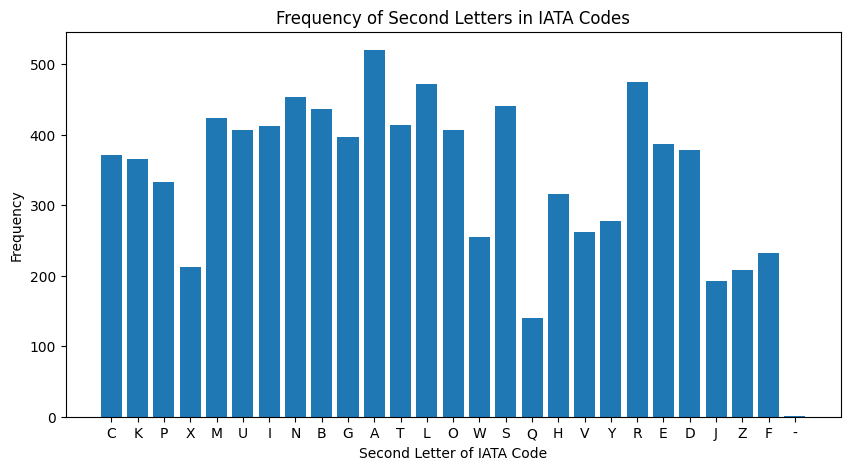

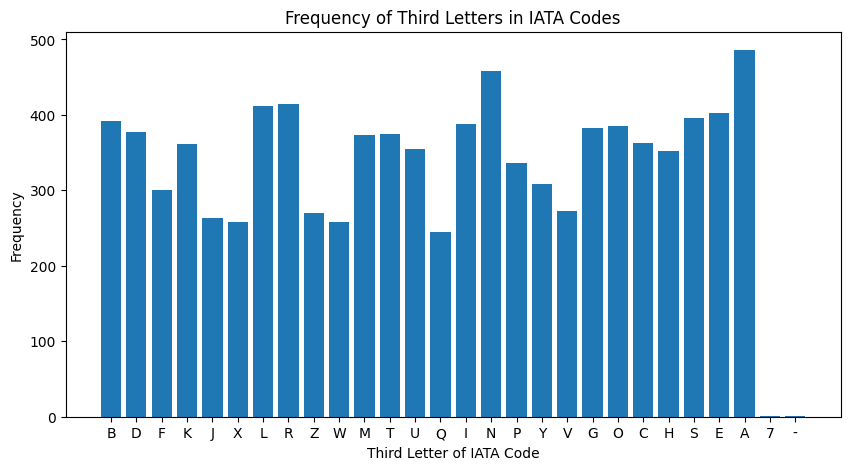

Most common first letter: [('M', 652)]
Most common second letter: [('A', 520)]
Most common third letter: [('A', 486)]
Optimal initial guess: MAA


In [ ]:
# write your code here; make sure to add lots of comments explaining your code
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# URL of the dataset
url = "https://raw.githubusercontent.com/bhasiEF/IATA_CodeList/main/airports-code%40public.csv"

# Reading the CSV file and selecting specific columns
airports = pd.read_csv(url, usecols=['IATA Code', 'Airport Name', 'City Name', 'Country Name'], header=0)

# Extract the IATA codes
iata_codes = airports['IATA Code'].dropna()

# Analyze the frequency of the first letter of IATA codes
first_letters = iata_codes.str[0]
first_letter_freq = Counter(first_letters)

# Plot the frequency of the first letters
plt.figure(figsize=(10, 5))
plt.bar(first_letter_freq.keys(), first_letter_freq.values())
plt.xlabel('First Letter of IATA Code')
plt.ylabel('Frequency')
plt.title('Frequency of First Letters in IATA Codes')
plt.show()

# Analyze the frequency of the second letters of IATA codes
second_letters = iata_codes.str[1].dropna()
second_letter_freq = Counter(second_letters)

# Plot the frequency of the second letters
plt.figure(figsize=(10, 5))
plt.bar(second_letter_freq.keys(), second_letter_freq.values())
plt.xlabel('Second Letter of IATA Code')
plt.ylabel('Frequency')
plt.title('Frequency of Second Letters in IATA Codes')
plt.show()

# Analyze the frequency of the third letters of IATA codes
third_letters = iata_codes.str[2].dropna()
third_letter_freq = Counter(third_letters)

# Plot the frequency of the third letters
plt.figure(figsize=(10, 5))
plt.bar(third_letter_freq.keys(), third_letter_freq.values())
plt.xlabel('Third Letter of IATA Code')
plt.ylabel('Frequency')
plt.title('Frequency of Third Letters in IATA Codes')
plt.show()

# Display the most common letters for strategic guessing
print("Most common first letter:", first_letter_freq.most_common(1))
print("Most common second letter:", second_letter_freq.most_common(1))
print("Most common third letter:", third_letter_freq.most_common(1))

# Example optimal initial guess based on the most frequent first letter
optimal_initial_guess = iata_codes[iata_codes.str.startswith(first_letter_freq.most_common(1)[0][0])].mode().values[0]
print("Optimal initial guess:", optimal_initial_guess)



(Detail your strategy recommendations here)



**B)** Speculate on how the optimal strategy for Airportle may differ from that for Wordle (played with 5 letter English words than 3-letter IATA codes). In what way might this difference reflect the difference between the structure of the language versus abbreviation codes?

(Walk us through your speculative reasoning here)



## Task 5.



The inferences made by data scientists based on analyzing data can only be as good as the datasets themselves. Therefore, the practice of data science can run into serious problems when different datasets about the same underlying phenomenon appear to be in disagreement.

For instance, consider two datasets on death rates due to mental health and substance abuse disorders across the world, from the 1990s to the 2010s: one from the [World Health Organization (WHO)](https://ourworldindata.org/grapher/death-rate-from-mental-health-and-substance-use-disorders-who?time=latest&country=~USA), and the other from the [Institute for Health Metrics and Evaluation (IHME)](https://ourworldindata.org/grapher/death-rates-from-mental-health-and-substance-use-disorders). The dataset from the IHME appears to be [age-standardized](https://ourworldindata.org/age-standardization), while the dataset from the WHO appears to be "crude rates" (the technical term for rates that have not been adjusted in any way). Thus these datasets (a) come from two distinct sources and (b) quantify the same phenomenon in different ways.

Below you will find both datasets imported in as dataframes:

In [ ]:
import pandas as pd

url_ihme = "https://raw.githubusercontent.com/bhasiEF/OWiD_MHSA_Deaths/main/IHME-age-adjusted-death-rates-from-mental-health-and-substance-use-disorders.csv"
ihme = pd.read_csv(url_ihme, header=0)
ihme

,Entity,Code,Year,Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,0.144067
1,Afghanistan,AFG,1991,0.140653
2,Afghanistan,AFG,1992,0.135279
3,Afghanistan,AFG,1993,0.133047
4,Afghanistan,AFG,1994,0.130073
...,...,...,...,...
6463,Zimbabwe,ZWE,2013,1.379243
6464,Zimbabwe,ZWE,2014,1.398058
6465,Zimbabwe,ZWE,2015,1.413464
6466,Zimbabwe,ZWE,2016,1.445058


In [ ]:
url_who = "https://raw.githubusercontent.com/bhasiEF/OWiD_MHSA_Deaths/main/WHO-death-rate-from-mental-health-and-substance-use-disorders.csv"
who = pd.read_csv(url_who, header=0)
who

,Entity,Code,Year,"Death rate per 100,000 people - Cause: Mental and substance use disorders - Sex: Both sexes - Age group: ALLAges"
0,Afghanistan,AFG,2000,1.12
1,Afghanistan,AFG,2001,1.15
2,Afghanistan,AFG,2002,1.17
3,Afghanistan,AFG,2003,1.19
4,Afghanistan,AFG,2004,1.23
...,...,...,...,...
3795,Zimbabwe,ZWE,2015,1.73
3796,Zimbabwe,ZWE,2016,1.75
3797,Zimbabwe,ZWE,2017,1.75
3798,Zimbabwe,ZWE,2018,1.76



**Analyze both datasets to compare how the WHO crude-rate data and IHME age-adjusted data paint different pictures of the global mental health/substance abuse landscape from the 1990s-2010s.**

What are the most interesting conclusions/inferences that both datasets point to? What are the most interesting conclusions that one dataset points to while the other does not? Is the difference simply explained by age standardization? If you believe so, justify your answer? If not, why not? And for each specific conclusion where the two datasets are in disagreement, which way of reporting death rates (age-adjusted or crude) do you think is more relevant for public health policy makers? Why?

**If there are other relevant datasets on OurWorldinData or elsewhere, feel free to bring those into your analysis. Please make sure to generate relevant data visualizations to support your claims.**

**Note**: We appreciate data visualizations that are aesthetically appealing and interesting, so a thank you in advance to those who go beyond line graphs and bar graphs on matplotlib.

In [ ]:
# write your code here; make sure to add lots of comments explaining your code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# URLs for the datasets
url_ihme = "https://raw.githubusercontent.com/bhasiEF/OWiD_MHSA_Deaths/main/IHME-age-adjusted-death-rates-from-mental-health-and-substance-use-disorders.csv"
url_who = "https://raw.githubusercontent.com/bhasiEF/OWiD_MHSA_Deaths/main/WHO-death-rate-from-mental-health-and-substance-use-disorders.csv"

# Load datasets
ihme = pd.read_csv(url_ihme)
who = pd.read_csv(url_who)

# Preview the datasets
print("IHME Dataset:")
print(ihme.head())

print("\nWHO Dataset:")
print(who.head())



IHME Dataset:
        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)  
0                                           0.144067                                       
1                                           0.140653                                       
2                                           0.135279                                       
3                                           0.133047                                       
4                                           0.130073                                       

WHO Dataset:
        Entity Code  Year  \
0  Afghanistan  AFG  2000   
1  Afghanistan  AFG  2001   
2  Afghanistan  AFG  2002   
3  Afghanistan  AFG  2003   
4  Afghanistan  AFG  2004   

   Death rate per 100,000 people - Cause: Mental and substance use dis

(Detail your inferences and the relevant discussion here)



## Task 6.

Consider [the image of a dog](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/YellowLabradorLooking_new.jpg/250px-YellowLabradorLooking_new.jpg) that we load into the notebook below:

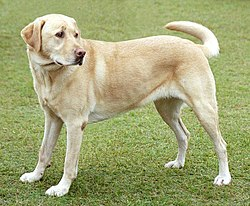

In [ ]:
from urllib.request import urlopen
from PIL import Image

image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/YellowLabradorLooking_new.jpg/250px-YellowLabradorLooking_new.jpg'
img = Image.open(urlopen(image_url))
img

Now let's try and see how this image is classified by an image classifier trained on ImageNet data. For this we first need to install and import some relevant packages.

In [ ]:
!pip install torchvision

from torchvision import models
import torch
import numpy as np

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

We'll be using [AlexNet](https://en.wikipedia.org/wiki/AlexNet) for our purposes here.

In [ ]:
alexnet = models.alexnet(weights='DEFAULT') # intitialize alexnet with default parameter weights

# defines a transform that turns images into tensors of the appropriate size, with normalized rgb values
from torchvision import transforms
transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(
 mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225]
 )])

img_t = transform(img) # applys transform to our image
batch_t = torch.unsqueeze(img_t, 0) # adds an extra dimension of length one to our tensor to turn our image into a batch of one image

alexnet.eval() # set the model to evaluation mode
out = alexnet(batch_t) # alexnet classifies our batch (with just one image)
p = torch.nn.functional.softmax(out, dim=1)[0].detach().numpy() # yields an array of probabilities associated with each of the possible classifications

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:05<00:00, 48.2MB/s]


We have the classification probabilities outputted by AlexNet, so let's now check that against the classifications list to see if it makes sense!

In [ ]:
# loads in the 1000 image net classifications
categories_url = 'https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
response = urlopen(categories_url).read().decode('UTF-8')

classes = eval(response).values() # extracts just the names of the classifications as a list
classes_sorted = [x for _, x in sorted(zip(p, classes),reverse=True)] # sorts them by the probabilities outputted by AlexNet, in descending order

class_prob = dict(zip(classes_sorted,np.flip(np.sort(p)))) # constructs a dictionary pairing classifications with probabilities.

# prints the 10 most likely classifications, along with their probabilities expressed as a percentage
for i in range(10):
  print(classes_sorted[i], ':', f"{100*class_prob[classes_sorted[i]]:.1f}%")

Labrador retriever : 28.8%
Saluki, gazelle hound : 22.7%
whippet : 13.0%
bull mastiff : 7.6%
golden retriever : 6.6%
Ibizan hound, Ibizan Podenco : 2.8%
dingo, warrigal, warragal, Canis dingo : 2.3%
Great Dane : 1.3%
Walker hound, Walker foxhound : 1.2%
kuvasz : 1.2%


Not bad! All of its top 10 classifications are dogs, and the top one appears to be the correct breed! Now we come to the task at hand ...

**A)** Some of the pixels in `img` were more important for AlexNet's successful classification than others. Come up with a way to quantify which pixels were more important and which were less important to the classification. Write code that does this analysis, such that at the end of your code, each pixel is assigned a numerical value associated with its relative importance for the classification.

In [ ]:
# write your code here; make sure to add lots of comments explaining your code
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# URL of ImageNet classifications
categories_url = 'https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'

# Fetch classifications from URL
response = urlopen(categories_url).read().decode('UTF-8')
classes = eval(response).values()

# Example image URL
image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/YellowLabradorLooking_new.jpg/250px-YellowLabradorLooking_new.jpg'

# Define transformation pipeline
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the image
img = Image.open(urlopen(image_url))

# Apply transformations
img_t = transform(img)
img_t.requires_grad_()  # Enable gradient calculation for the input image tensor

# Add batch dimension
batch_t = torch.unsqueeze(img_t, 0)

# Load AlexNet model
alexnet = models.alexnet(pretrained=True)
alexnet.eval()

# Forward pas


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

**B)** Since you've assigned a relative importance value to each pixel, we can actually visualize this itself as an image, for instance using `matplotlib.pyplot.imshow()`. How does the image look to you? Does it surprise you? Does what you see suggest anything interesting about the nature of image classification, or cognition, or even of nature itself?

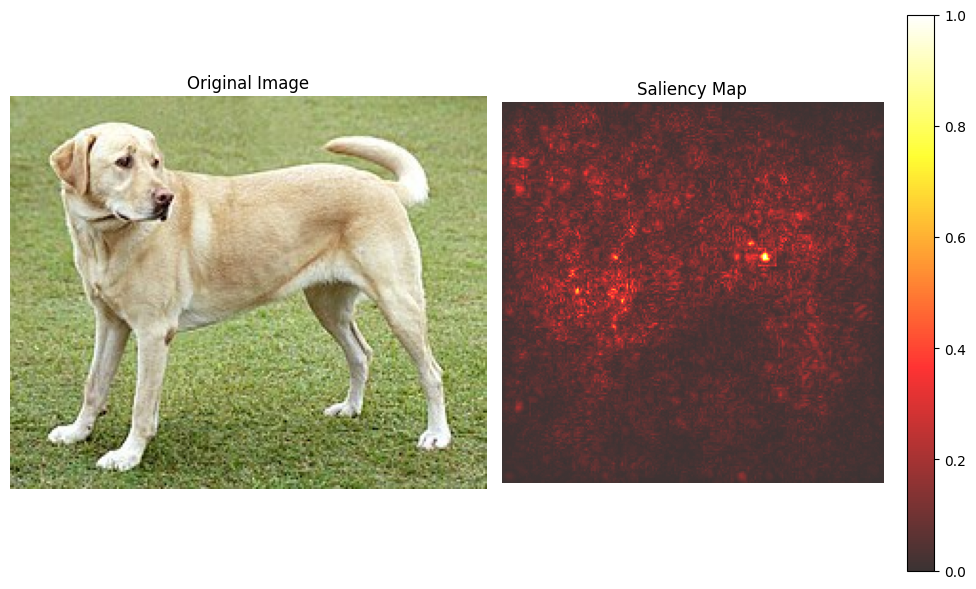

Pixel importance values (normalized):
[[0.00099292 0.00285336 0.00789432 ... 0.00278167 0.0025851  0.00309044]
 [0.0058662  0.00039184 0.00607941 ... 0.00396865 0.00165245 0.00270321]
 [0.01788117 0.0158818  0.0051441  ... 0.00354901 0.00240537 0.00348739]
 ...
 [0.00281193 0.01066186 0.02362545 ... 0.00090762 0.00260238 0.00649342]
 [0.00063529 0.00586241 0.01232175 ... 0.00092163 0.00443501 0.00741618]
 [0.00167039 0.0015676  0.00442715 ... 0.00358444 0.00609286 0.0109211 ]]


In [ ]:
# write your code here; make sure to add lots of comments explaining your code
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# URL of ImageNet classifications
categories_url = 'https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'

# Fetch classifications from URL
response = urlopen(categories_url).read().decode('UTF-8')
classes = eval(response).values()

# Example image URL
image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/YellowLabradorLooking_new.jpg/250px-YellowLabradorLooking_new.jpg'

# Define transformation pipeline
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the image
img = Image.open(urlopen(image_url))

# Apply transformations
img_t = transform(img)
img_t.requires_grad_()  # Enable gradient calculation for the input image tensor

# Add batch dimension
batch_t = torch.unsqueeze(img_t, 0)

# Load AlexNet model
alexnet = models.alexnet(pretrained=True)
alexnet.eval()

# Forward pass through the model
out = alexnet(batch_t)

# Get predicted class index with highest probability
pred_class_idx = torch.argmax(out, dim=1).item()

# Calculate gradient of output with respect to input image
out[:, pred_class_idx].backward()

# Get gradients from image tensor
gradients = img_t.grad.data

# Compute pixel importance by taking the absolute maximum across color channels
pixel_importance = torch.abs(gradients).max(dim=0, keepdim=True)[0].squeeze()
pixel_importance = pixel_importance.cpu().numpy()

# Normalize pixel importance to range [0, 1]
pixel_importance = (pixel_importance - pixel_importance.min()) / (pixel_importance.max() - pixel_importance.min())

# Visualize the saliency map
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pixel_importance, cmap='hot', alpha=0.8)
plt.colorbar()
plt.title('Saliency Map')
plt.axis('off')

plt.tight_layout()
plt.show()

# Optionally, print or analyze pixel importance values
print("Pixel importance values (normalized):")
print(pixel_importance)


(Detail your reflections here.)